In [2]:
import pandas as pd
import numpy as np
#import seaborn as sns

In [3]:
# Reading DataSet
dataset=pd.read_csv("train.csv")

In [8]:
#Droping unnecessary columns
dataset=dataset.drop(columns=['Dev_ID','Geographic_Regions','Gender','Age','Project_Age','Dev_Status','Education','Expt_Het'],axis=1)

In [9]:
dataset.head()

,Int_Learn,Fin_Gain,Tech_Cont_Norm,Sys_Int,Cod_Test_Task,Cont_Code_Dec,Dec_Right_Dec,Dev_Inv,Proj_Desertion,Promoted,Dev_Experience
0,6.00,5.00,4.67,5.50,4.8,3.8,4.2,4.0,7.0,0,1
1,5.67,4.75,4.50,4.75,4.6,4.0,3.6,6.2,2.4,1,5
2,6.67,6.50,4.83,6.00,6.2,5.4,3.6,6.8,4.0,0,1
3,5.67,5.75,5.33,6.50,3.8,1.8,2.2,7.0,1.4,1,1
4,5.00,5.50,4.67,5.00,4.2,3.2,4.2,4.4,3.8,0,2


In [10]:
# Printing all the column names for our reference
dataset.columns

Index(['Int_Learn', 'Fin_Gain', 'Tech_Cont_Norm', 'Sys_Int', 'Cod_Test_Task',
       'Cont_Code_Dec', 'Dec_Right_Dec', 'Dev_Inv', 'Proj_Desertion',
       'Promoted', 'Dev_Experience'],
      dtype='object')

In [11]:
# Separate Target Variable and Predictor Variables
TargetVariable='Promoted'
Predictors=[i for i in dataset.columns if i not in TargetVariable]
print(Predictors)
X=dataset[Predictors].values
y=dataset[TargetVariable].values

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=428)

['Int_Learn', 'Fin_Gain', 'Tech_Cont_Norm', 'Sys_Int', 'Cod_Test_Task', 'Cont_Code_Dec', 'Dec_Right_Dec', 'Dev_Inv', 'Proj_Desertion', 'Dev_Experience']


In [12]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(121, 10) (52, 10) (121,) (52,)


In [13]:
### Sandardization of data ###
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Choose either standardization or Normalization
# On this data Min Max Normalization produced better results

# Choose between standardization and MinMAx normalization
#PredictorScaler=StandardScaler()
PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X
X=PredictorScalerFit.transform(X)

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [14]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(121, 10) (52, 10) (121,) (52,)


In [15]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
# choose parameter Penalty='l1' or C=1
# choose different values for solver 'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'
clf = LogisticRegression(C=1,penalty='l2', solver='newton-cg')

# Printing all the parameters of logistic regression
# print(clf)

# Creating the model on Training Data
LOG=clf.fit(X_train,y_train)
prediction_log=LOG.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction_log))
print(metrics.confusion_matrix(y_test, prediction_log))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction_log, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(LOG, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95        45
           1       0.75      0.43      0.55         7

    accuracy                           0.90        52
   macro avg       0.83      0.70      0.75        52
weighted avg       0.89      0.90      0.89        52

[[44  1]
 [ 4  3]]
Accuracy of the model on Testing Sample Data: 0.89

Accuracy values for 10-fold Cross Validation:
 [0.75757576 0.86458333 0.86458333 0.82720588 0.93232132 0.82720588
 0.80892495 0.85686275 0.71372549 1.        ]

Final Average Accuracy of the model: 0.85


DecisionTreeClassifier()
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        45
           1       0.78      1.00      0.88         7

    accuracy                           0.96        52
   macro avg       0.89      0.98      0.93        52
weighted avg       0.97      0.96      0.96        52

[[43  2]
 [ 0  7]]
Accuracy of the model on Testing Sample Data: 0.96

Accuracy values for 10-fold Cross Validation:
 [0.93978495 0.75757576 0.94745484 0.88235294 0.88235294 0.82720588
 0.94428883 0.85686275 0.80892495 1.        ]

Final Average Accuracy of the model: 0.88


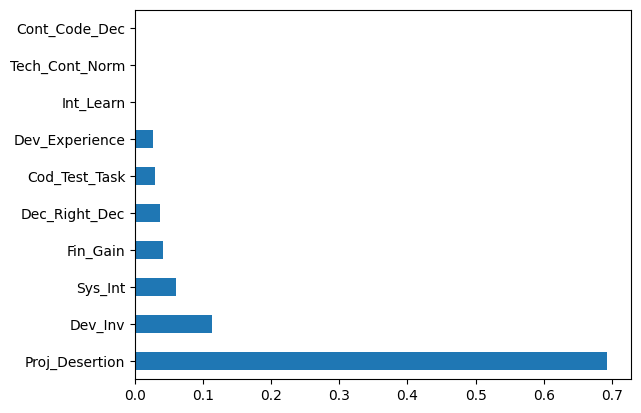

In [16]:
#Decision Trees
from sklearn import tree
#choose from different tunable hyper parameters
clf = tree.DecisionTreeClassifier()

# Printing all the parameters of Decision Trees
print(clf)

# Creating the model on Training Data
DTree=clf.fit(X_train,y_train)
prediction_DT=DTree.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction_DT))
print(metrics.confusion_matrix(y_test, prediction_DT))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction_DT, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(DTree.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(DTree, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

[Text(0.5416666666666666, 0.9166666666666666, 'X[8] <= 0.317\ngini = 0.276\nsamples = 121\nvalue = [101, 20]'),
 Text(0.25, 0.75, 'X[1] <= 0.375\ngini = 0.308\nsamples = 21\nvalue = [4, 17]'),
 Text(0.16666666666666666, 0.5833333333333334, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.3333333333333333, 0.5833333333333334, 'X[6] <= 0.932\ngini = 0.255\nsamples = 20\nvalue = [3, 17]'),
 Text(0.16666666666666666, 0.4166666666666667, 'X[9] <= 0.9\ngini = 0.117\nsamples = 16\nvalue = [1, 15]'),
 Text(0.08333333333333333, 0.25, 'gini = 0.0\nsamples = 14\nvalue = [0, 14]'),
 Text(0.25, 0.25, 'X[4] <= 0.75\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.16666666666666666, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.3333333333333333, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.5, 0.4166666666666667, 'X[3] <= 0.979\ngini = 0.5\nsamples = 4\nvalue = [2, 2]'),
 Text(0.4166666666666667, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [2, 0

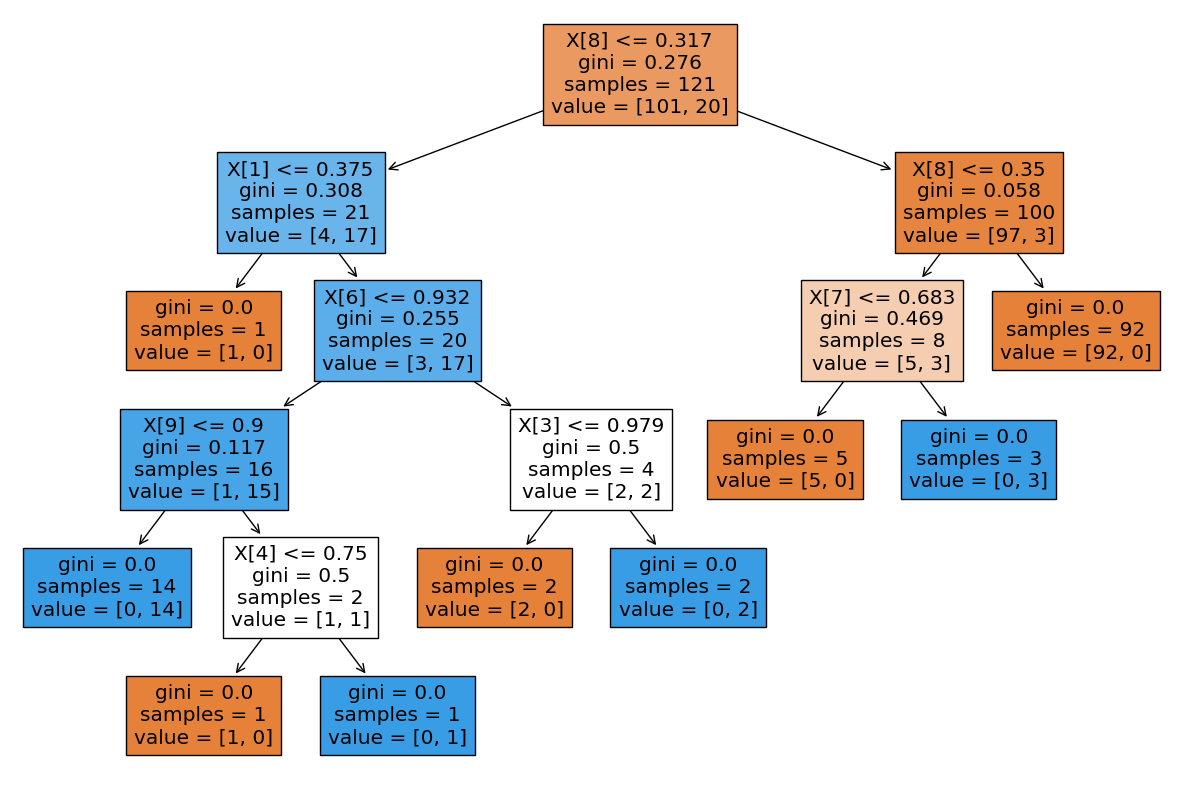

In [17]:
from sklearn import tree
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
tree.plot_tree(clf,filled=True)

In [18]:
from sklearn.metrics import roc_curve, auc
roc_curve(y_test, prediction_DT)

(array([0.        , 0.04444444, 1.        ]),
 array([0., 1., 1.]),
 array([2, 1, 0], dtype=int64))

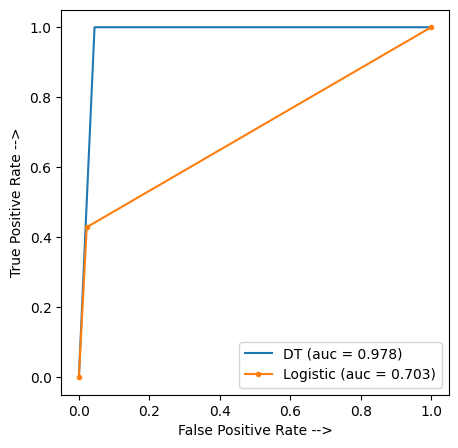

In [19]:
from sklearn.metrics import roc_curve, auc

DT_fpr, DT_tpr, threshold = roc_curve(y_test, prediction_DT)
auc_DT = auc(DT_fpr,DT_tpr)

logistic_fpr, logistic_tpr, threshold = roc_curve(y_test, prediction_log)
auc_logistic = auc(logistic_fpr, logistic_tpr)

plt.figure(figsize=(5, 5), dpi=100)
plt.plot(DT_fpr, DT_tpr, linestyle='-', label='DT (auc = %0.3f)' % auc_DT)
plt.plot(logistic_fpr, logistic_tpr, marker='.', label='Logistic (auc = %0.3f)' % auc_logistic)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

plt.show()

In [20]:
#Hyperparameter tuning for decision tree
params={
 "splitter"    : ["best","random"] ,
    "criterion":['gini','entropy'],
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_samples_leaf" : [ 1,2,3,4,5 ],
"min_weight_fraction_leaf":[0.1,0.2,0.3,0.4],
 "max_features" : ["auto","log2","sqrt",None ],
    "max_leaf_nodes":[None,10,20,30,40,50,60,70]
    
}

In [21]:

## Hyperparameter optimization using GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()

random_search=GridSearchCV(dtree,param_grid=params,scoring='f1_weighted',n_jobs=-1,cv=5,verbose=3)
random_search.fit(X,y)

Fitting 5 folds for each of 20480 candidates, totalling 102400 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 8, 10, 12, 15],
                         'max_features': ['auto', 'log2', 'sqrt', None],
                         'max_leaf_nodes': [None, 10, 20, 30, 40, 50, 60, 70],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_weight_fraction_leaf': [0.1, 0.2, 0.3, 0.4],
                         'splitter': ['best', 'random']},
             scoring='f1_weighted', verbose=3)

In [22]:
random_search.best_params_

{'criterion': 'gini',
 'max_depth': 3,
 'max_features': 'sqrt',
 'max_leaf_nodes': 20,
 'min_samples_leaf': 2,
 'min_weight_fraction_leaf': 0.1,
 'splitter': 'best'}

In [23]:
random_search.best_score_

0.9405572648002736

RandomForestClassifier(criterion='entropy', max_depth=10)
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        45
           1       0.71      0.71      0.71         7

    accuracy                           0.92        52
   macro avg       0.83      0.83      0.83        52
weighted avg       0.92      0.92      0.92        52

[[43  2]
 [ 2  5]]
Accuracy of the model on Testing Sample Data: 0.92

Accuracy values for 10-fold Cross Validation:
 [0.93978495 0.86458333 0.94745484 0.94604462 0.88235294 0.79696395
 0.88235294 0.93630832 0.94428883 1.        ]

Final Average Accuracy of the model: 0.91


<AxesSubplot:>

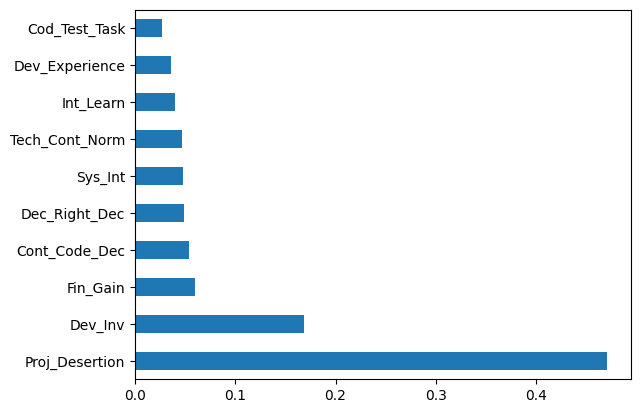

In [24]:
# Random Forest (Bagging of multiple Decision Trees)
from sklearn.ensemble import RandomForestClassifier
# Choose various values of max_depth, n_estimators and criterion for tuning the model
random = RandomForestClassifier(max_depth=10, n_estimators=100,criterion='entropy')


# Printing all the parameters of Random Forest
print(random)

# Creating the model on Training Data
RF=random.fit(X_train,y_train)
prediction_RF=RF.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction_RF))
print(metrics.confusion_matrix(y_test, prediction_RF))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction_RF, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RF, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


# Plotting the feature importance for Top 4 most important columns
%matplotlib inline
feature_importances = pd.Series(RF.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

In [26]:
from sklearn.metrics import roc_curve, auc
roc_curve(y_test, prediction_RF)

(array([0.        , 0.04444444, 1.        ]),
 array([0.        , 0.71428571, 1.        ]),
 array([2, 1, 0], dtype=int64))

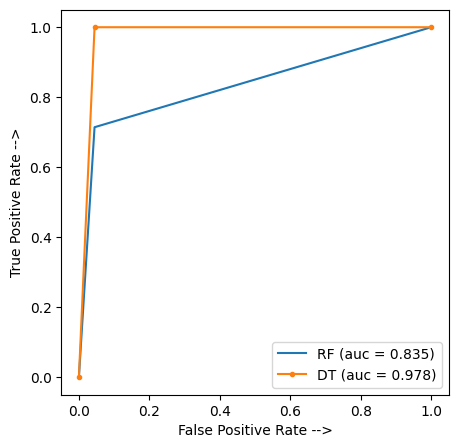

In [25]:
from sklearn.metrics import roc_curve, auc

RF_fpr, RF_tpr, threshold = roc_curve(y_test, prediction_RF)
auc_RF = auc(RF_fpr,RF_tpr)

decision_fpr, decision_tpr, threshold = roc_curve(y_test, prediction_DT)
auc_decision = auc(decision_fpr, decision_tpr)

plt.figure(figsize=(5, 5), dpi=100)
plt.plot(RF_fpr, RF_tpr, linestyle='-', label='RF (auc = %0.3f)' % auc_RF)
plt.plot(decision_fpr, decision_tpr, marker='.', label='DT (auc = %0.3f)' % auc_decision)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

plt.show()

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=4),
                   learning_rate=0.01, n_estimators=200)
              precision    recall  f1-score   support

           0       1.00      0.93      0.97        45
           1       0.70      1.00      0.82         7

    accuracy                           0.94        52
   macro avg       0.85      0.97      0.89        52
weighted avg       0.96      0.94      0.95        52

[[42  3]
 [ 0  7]]
Accuracy of the model on Testing Sample Data: 0.95

Accuracy values for 10-fold Cross Validation:
 [0.86458333 0.93978495 0.94745484 0.79696395 0.8977591  0.88235294
 0.94428883 0.93630832 0.94428883 0.74383302]

Final Average Accuracy of the model: 0.89


<AxesSubplot:>

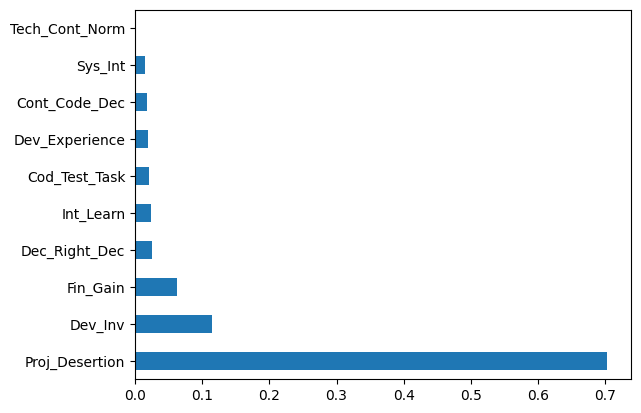

In [27]:
# Adaboost 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Choosing Decision Tree with 1 level as the weak learner
# Choose different values of max_depth, n_estimators and learning_rate to tune the model
DTC=DecisionTreeClassifier(max_depth=4)
clf = AdaBoostClassifier(n_estimators=200, base_estimator=DTC ,learning_rate=0.01)

# Printing all the parameters of Adaboost
print(clf)

# Creating the model on Training Data
AB=clf.fit(X_train,y_train)
prediction_AB=AB.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction_AB))
print(metrics.confusion_matrix(y_test, prediction_AB))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction_AB, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(AB, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(AB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

In [28]:
from sklearn.metrics import roc_curve, auc
roc_curve(y_test, prediction_AB)

(array([0.        , 0.06666667, 1.        ]),
 array([0., 1., 1.]),
 array([2, 1, 0], dtype=int64))

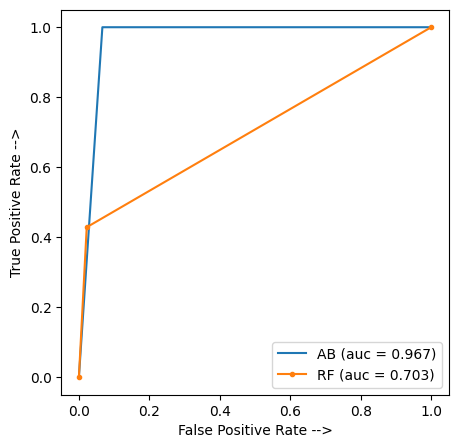

In [29]:
from sklearn.metrics import roc_curve, auc

AB_fpr, AB_tpr, threshold = roc_curve(y_test, prediction_AB)
auc_AB = auc(AB_fpr,AB_tpr)

randomForest_fpr, randomForest_tpr, threshold = roc_curve(y_test, prediction_RF)
auc_randomForest = auc(randomForest_fpr, randomForest_tpr)

plt.figure(figsize=(5, 5), dpi=100)
plt.plot(AB_fpr, AB_tpr, linestyle='-', label='AB (auc = %0.3f)' % auc_AB)
plt.plot(logistic_fpr, logistic_tpr, marker='.', label='RF (auc = %0.3f)' % auc_logistic)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

plt.show()

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, gamma=None,
              gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=10,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=None,
              reg_alpha=None, reg_lambda=None, ...)
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        45
           1       0.71      0.71      0.71         7

    accuracy                           0.92        52
   macro avg       0.83      0.83      

<AxesSubplot:>

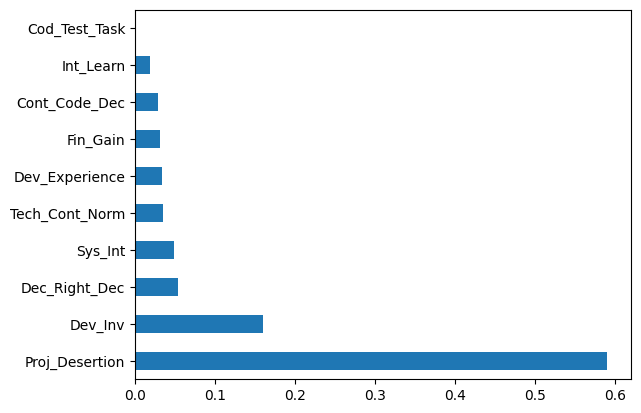

In [30]:
# Xtreme Gradient Boosting (XGBoost)
from xgboost import XGBClassifier
clf=XGBClassifier(max_depth=10, learning_rate=0.01, n_estimators=200, objective='binary:logistic', booster='gbtree')

# Printing all the parameters of XGBoost
print(clf)

# Creating the model on Training Data
XGB=clf.fit(X_train,y_train)
prediction_XGB=XGB.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction_XGB))
print(metrics.confusion_matrix(y_test, prediction_XGB))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction_XGB, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(XGB, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(XGB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

In [31]:
## Hyper Parameter Optimization

params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}
## Hyperparameter optimization using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import xgboost


clf=xgboost.XGBClassifier()
random_search=RandomizedSearchCV(clf,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

random_search.fit(X,y)


Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, gamma=None,
                                           gpu_id=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None, max_bin=None,...
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=None,
                                           reg_alpha=None, reg_lambda=None, ...),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [3, 4, 5, 6, 8, 10, 12,
                                                      15],
                                        'min_child_weight': [1, 3, 5, 7]},
                   scoring='roc_auc', verbose=3)

In [32]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.3,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.3, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=8, max_leaves=0, min_child_weight=3,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [33]:
random_search.best_params_

{'min_child_weight': 3,
 'max_depth': 8,
 'learning_rate': 0.1,
 'gamma': 0.3,
 'colsample_bytree': 0.3}

In [34]:
classifier=xgboost.XGBClassifier(base_score=0.5, colsample_bytree=0.7, gamma=0.3, learning_rate=0.1, max_depth=10, min_child_weight=5, booster='gbtree',max_delta_step=0,n_estimators=200, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

In [35]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(classifier,X,y,cv=10)

[00:38:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:38:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:38:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false

In [36]:
score

array([0.94444444, 0.88888889, 0.94444444, 0.94117647, 0.88235294,
       0.88235294, 0.82352941, 1.        , 0.94117647, 1.        ])

In [37]:
score.mean()

0.9248366013071895

In [38]:
XGB=classifier.fit(X_train,y_train)
prediction_XGB=XGB.predict(X_test)

[00:39:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




              precision    recall  f1-score   support

           0       0.93      0.96      0.95        45
           1       0.67      0.57      0.62         7

    accuracy                           0.90        52
   macro avg       0.80      0.76      0.78        52
weighted avg       0.90      0.90      0.90        52

[[43  2]
 [ 3  4]]
Accuracy of the model on Testing Sample Data: 0.9
[00:39:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:39:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some p

<AxesSubplot:>

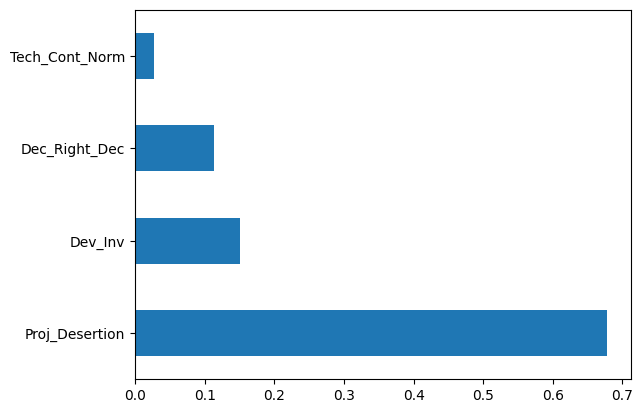

In [39]:
# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction_XGB))
print(metrics.confusion_matrix(y_test, prediction_XGB))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction_XGB, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(XGB, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

# Plotting the feature importance for Top 4 most important columns
%matplotlib inline
feature_importances = pd.Series(XGB.feature_importances_, index=Predictors)
feature_importances.nlargest(4).plot(kind='barh')

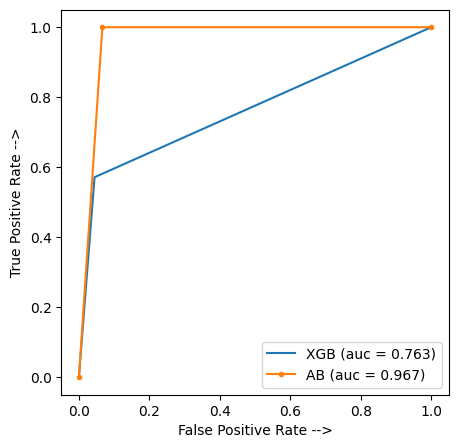

In [40]:
from sklearn.metrics import roc_curve, auc

XGB_fpr, XGB_tpr, threshold = roc_curve(y_test, prediction_XGB)
auc_XGB = auc(XGB_fpr,XGB_tpr)

AB_fpr, AB_tpr, threshold = roc_curve(y_test, prediction_AB)
auc_AB = auc(AB_fpr, AB_tpr)

plt.figure(figsize=(5, 5), dpi=100)
plt.plot(XGB_fpr, XGB_tpr, linestyle='-', label='XGB (auc = %0.3f)' % auc_XGB)
plt.plot(AB_fpr, AB_tpr, marker='.', label='AB (auc = %0.3f)' % auc_AB)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

plt.show()

In [41]:
X_train.shape
X_test.shape

(52, 10)

In [42]:
# Naive Bays
from sklearn.naive_bayes import GaussianNB, MultinomialNB

# GaussianNB is used in Binomial Classification
# MultinomialNB is used in multi-class classification
clfNaive = GaussianNB()
#clf = MultinomialNB()

# Printing all the parameters of Naive Bayes
print(clfNaive)

NB=clfNaive.fit(X_train,y_train)
prediction_NB=NB.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction_NB))
print(metrics.confusion_matrix(y_test, prediction_NB))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction_NB, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(NB, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

GaussianNB()
              precision    recall  f1-score   support

           0       0.93      0.91      0.92        45
           1       0.50      0.57      0.53         7

    accuracy                           0.87        52
   macro avg       0.72      0.74      0.73        52
weighted avg       0.87      0.87      0.87        52

[[41  4]
 [ 3  4]]
Accuracy of the model on Testing Sample Data: 0.87

Accuracy values for 10-fold Cross Validation:
 [0.93978495 0.94745484 0.89880952 1.         0.88235294 0.76470588
 0.94428883 0.83286648 0.94428883 1.        ]

Final Average Accuracy of the model: 0.92


In [43]:
# Getting the test data
test=pd.read_csv("test.csv")

In [44]:
test.head()

,Dev_ID,Geographic_Regions,Int_Learn,Fin_Gain,Expt_Het,Tech_Cont_Norm,Sys_Int,Cod_Test_Task,Cont_Code_Dec,Dec_Right_Dec,Dev_Inv,Proj_Desertion,Project_Age,Dev_Status,Gender,Age,Education,Dev_Experience
0,1001,Asia,6.00,5.00,2.00,4.67,5.50,4.8,3.8,4.2,4.0,7.0,<1 year,Planning,M,30–39,Doctorate,1
1,1002,North America,5.67,4.75,2.33,4.50,4.75,4.6,4.0,3.6,6.2,2.4,2-3 years,Alpha,F,40–49,Doctorate,5
2,1003,Caribbean,6.67,6.50,1.00,4.83,6.00,6.2,5.4,3.6,6.8,4.0,<1 year,Pre-alpha,F,30–39,Masters,1
3,1004,Central America,5.67,5.75,1.33,5.33,6.50,3.8,1.8,2.2,7.0,1.4,<1 year,Planning,M,30–39,Masters,1
4,1005,Europe,5.00,5.50,2.33,4.67,5.00,4.2,3.2,4.2,4.4,3.8,1-2 years,Pre-alpha,M,30–39,Doctorate,2


In [45]:
#Droping unnecessary columns
testData=test.drop(columns=['Dev_ID','Geographic_Regions','Gender','Age','Project_Age','Dev_Status','Education','Expt_Het'],axis=1)

In [46]:
testData.head()

,Int_Learn,Fin_Gain,Tech_Cont_Norm,Sys_Int,Cod_Test_Task,Cont_Code_Dec,Dec_Right_Dec,Dev_Inv,Proj_Desertion,Dev_Experience
0,6.00,5.00,4.67,5.50,4.8,3.8,4.2,4.0,7.0,1
1,5.67,4.75,4.50,4.75,4.6,4.0,3.6,6.2,2.4,5
2,6.67,6.50,4.83,6.00,6.2,5.4,3.6,6.8,4.0,1
3,5.67,5.75,5.33,6.50,3.8,1.8,2.2,7.0,1.4,1
4,5.00,5.50,4.67,5.00,4.2,3.2,4.2,4.4,3.8,2


In [47]:
#Keeping Copy of datset for future reference
mainTestData=testData.copy()
#Calculation Missing VAlues in indivisual column
testData.isnull().sum()

Int_Learn         0
Fin_Gain          0
Tech_Cont_Norm    0
Sys_Int           0
Cod_Test_Task     0
Cont_Code_Dec     0
Dec_Right_Dec     0
Dev_Inv           0
Proj_Desertion    0
Dev_Experience    0
dtype: int64

In [48]:
# Deployment of the Model

In [49]:
# Step 1. Retraining the model using 100% data
# XGBoost 
import xgboost
from sklearn.tree import DecisionTreeClassifier

# Using the XGBoost algorithm with final hyperparamters
classifier=xgboost.XGBClassifier(base_score=0.5, colsample_bytree=0.7, gamma=0.3, learning_rate=0.1, max_depth=10, min_child_weight=5, booster='gbtree',max_delta_step=0,n_estimators=200, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

# Training the model on 100% Data available
FinalXGBModel=classifier.fit(X,y)

[00:39:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




In [50]:
# Step 2. Save the model as a serialized file which can be stored anywhere
import pickle
import os

# Saving the Python objects as serialized files can be done using pickle library
# Here let us save the Final ZomatoRatingModel
with open('FinalXGBModel.pkl', 'wb') as fileWriteStream:
    pickle.dump(FinalXGBModel, fileWriteStream)
    # Don't forget to close the filestream!
    fileWriteStream.close()
    
print('pickle file of Predictive Model is saved at Location:',os.getcwd())

pickle file of Predictive Model is saved at Location: C:\Users\HP\Desktop\OurProject2022\CommitterAssessment\DA_And_ModelBuilding


In [51]:
# This Function can be called from any from any front end tool/website
def predict_promotion(test):
    DataSet=test
    #Avoidng Dumy Trap for applying Drop First
    DataSet=pd.get_dummies(DataSet,drop_first=True)
    # Maintaining the same order of columns as it was during the model training
    Num_Inputs = DataSet.shape[0]
    print(Num_Inputs)
    Predictors=['Int_Learn','Fin_Gain','Tech_Cont_Norm','Sys_Int','Cod_Test_Task','Cont_Code_Dec', 'Dec_Right_Dec','Dev_Inv', 'Proj_Desertion','Dev_Experience']
    X=DataSet[Predictors].values
    X=PredictorScalerFit.transform(X)
    print(X)
    # Loading the Function from pickle file
    import pickle
    with open('FinalXGBModel.pkl', 'rb') as fileReadStream:
        XGB_model=pickle.load(fileReadStream)
        # Don't forget to close the filestream!
        fileReadStream.close()
        
    # Genrating Predictions
    Prediction=XGB_model.predict(X)
    PredictedStatus=pd.DataFrame(Prediction, columns=['Predicted Status'])
    
    return(PredictedStatus)

In [52]:
predict_promotion(test)

173
[[0.83333333 0.66666667 0.84757506 ... 0.5        1.         0.        ]
 [0.77833333 0.625      0.80831409 ... 0.86666667 0.23333333 0.8       ]
 [0.945      0.91666667 0.88452656 ... 0.96666667 0.5        0.        ]
 ...
 [0.77833333 0.66666667 0.92378753 ... 0.73333333 0.43333333 0.        ]
 [0.72166667 0.5        0.84757506 ... 0.66666667 0.83333333 0.2       ]
 [0.5        0.625      0.80831409 ... 0.43333333 0.83333333 0.        ]]


,Predicted Status
0,0
1,1
2,0
3,1
4,0
...,...
168,0
169,0
170,0
171,0
